In [1]:
import numpy as np
import matplotlib.pyplot as plt
import  math
from scipy.stats import norm
from scipy.optimize import brentq

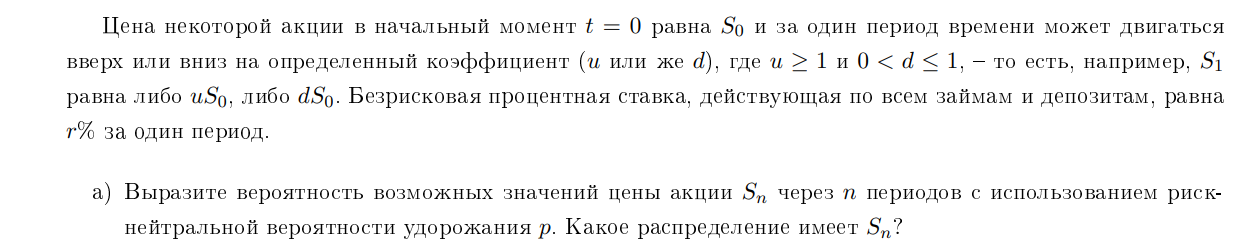

In [2]:
# Исходные данные
S0 = 100  # начальная цена акции
mu = 0.05  # средняя доходность
sigma = 0.15  # волатильность
T = 1  # общий период времени
n = 1000  # количество временных интервалов
num_simulations = 10000  # количество траекторий

In [3]:

dt = T / n
u = np.exp(sigma * np.sqrt(dt))  # u = e^(σ√T/n)
d = np.exp(-sigma * np.sqrt(dt)) # d = e^(-σ√T/n)
p = 0.5 + 0.5 * mu / sigma * np.sqrt(dt) # p = 1/2 + 1/2 * μ/σ√T

In [4]:

# Вычисляем вероятность
n = 10  # количество шагов
prices = []
for k in range(n + 1):
    price = S0 * (u ** k) * (d ** (n - k))
    prob = math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
    prices.append((price, prob))

print("Возможные цены и вероятности:")
for price, prob in prices:
    print(f"Цена: {price:.2f}, Вероятность: {prob:.4f}")


Возможные цены и вероятности:
Цена: 95.37, Вероятность: 0.0009
Цена: 96.28, Вероятность: 0.0090
Цена: 97.19, Вероятность: 0.0412
Цена: 98.12, Вероятность: 0.1123
Цена: 99.06, Вероятность: 0.2007
Цена: 100.00, Вероятность: 0.2460
Цена: 100.95, Вероятность: 0.2093
Цена: 101.92, Вероятность: 0.1222
Цена: 102.89, Вероятность: 0.0468
Цена: 103.87, Вероятность: 0.0106
Цена: 104.86, Вероятность: 0.0011


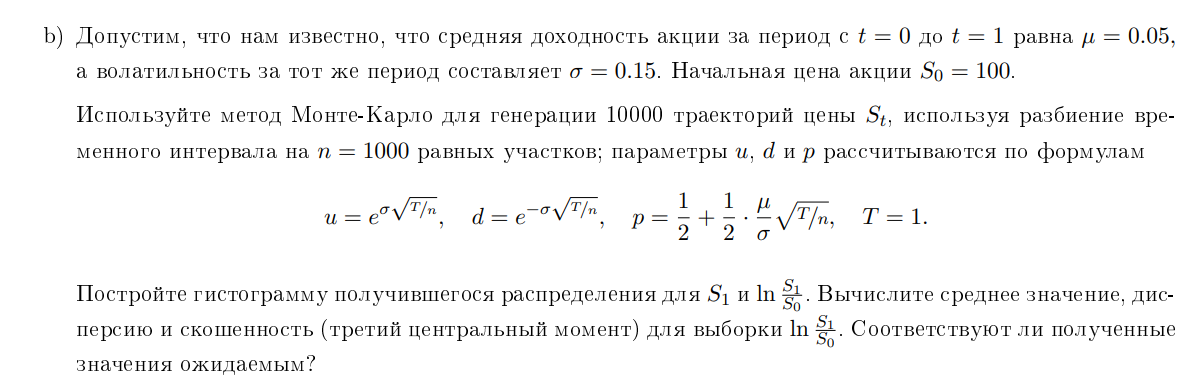

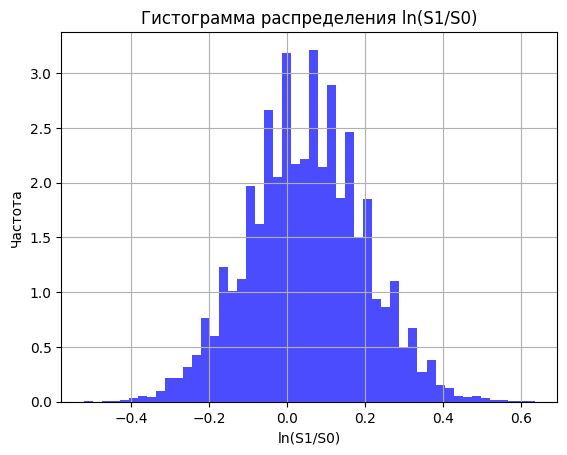

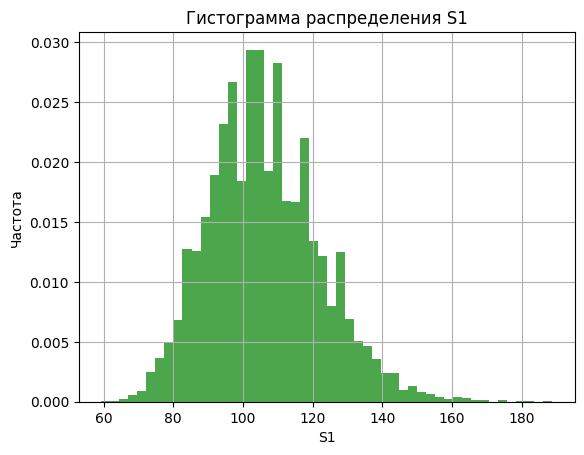

Характеристики распределения ln(S1/S0):
Среднее значение: 0.0499
Дисперсия: 0.0221
Асимметрия: 0.0343

Характеристики распределения S1:
Среднее значение: 106.2822
Дисперсия: 253.7750
Асимметрия: 0.4929


In [5]:
# Исходные параметры
n = 1000  # количество временных шагов

# Установка начального генератора случайных чисел
np.random.seed(42)

# Генерация траекторий методом Монте-Карло
num_simulations = 10000
ln_S_ratio = []
S1_values = []

for _ in range(num_simulations):
    path = np.log(S0)
    for _ in range(n):
        rand = np.random.choice([np.log(u), np.log(d)], p=[p, 1 - p])
        path += rand
    ln_S_ratio.append(path - np.log(S0))  # логарифм отношения
    S1 = np.exp(path)
    S1_values.append(S1)  # значение S1

S1_values = np.array(S1_values)

# Построение гистограммы для ln(S1/S0)
plt.hist(ln_S_ratio, bins=50, density=True, alpha=0.7, color='blue')
plt.title("Гистограмма распределения ln(S1/S0)")
plt.xlabel("ln(S1/S0)")
plt.ylabel("Частота")
plt.grid()
plt.show()

# Построение гистограммы для S1
plt.hist(S1_values, bins=50, density=True, alpha=0.7, color='green')
plt.title("Гистограмма распределения S1")
plt.xlabel("S1")
plt.ylabel("Частота")
plt.grid()
plt.show()

# Вычисление среднего, дисперсии и асимметрии для ln(S1/S0)
mean_ln_S_ratio = np.mean(ln_S_ratio)
variance_ln_S_ratio = np.var(ln_S_ratio)
skewness_ln_S_ratio = np.mean((ln_S_ratio - mean_ln_S_ratio) ** 3) / (variance_ln_S_ratio ** 1.5)

print("Характеристики распределения ln(S1/S0):")
print(f"Среднее значение: {mean_ln_S_ratio:.4f}")
print(f"Дисперсия: {variance_ln_S_ratio:.4f}")
print(f"Асимметрия: {skewness_ln_S_ratio:.4f}")

# Вычисление среднего, дисперсии и асимметрии для S1
mean_S1 = np.mean(S1_values)
variance_S1 = np.var(S1_values)
skewness_S1 = np.mean((S1_values - mean_S1) ** 3) / (np.std(S1_values) ** 3)

print("\nХарактеристики распределения S1:")
print(f"Среднее значение: {mean_S1:.4f}")
print(f"Дисперсия: {variance_S1:.4f}")
print(f"Асимметрия: {skewness_S1:.4f}")


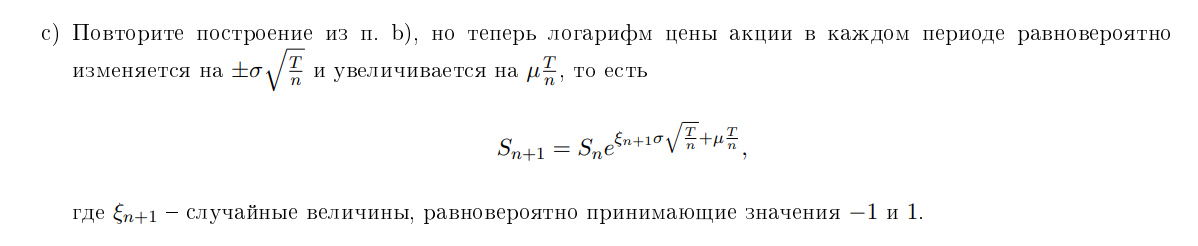

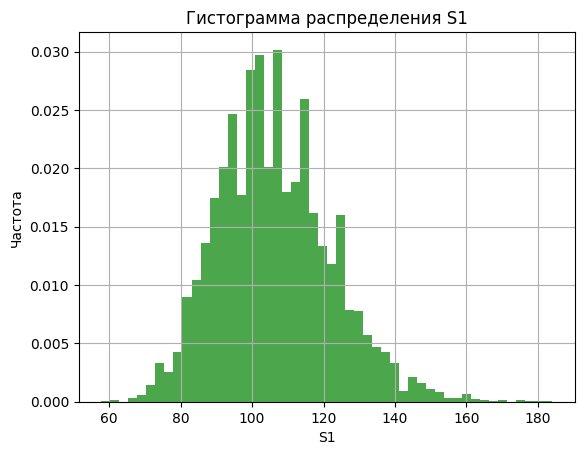

Характеристики распределения S1:
Среднее значение: 106.3350
Дисперсия: 252.2591
Асимметрия: 0.4735


In [6]:

# Установка начального генератора случайных чисел
np.random.seed(42)

# Генерация траекторий методом Монте-Карло
num_simulations = 10000
S1_values = []

for _ in range(num_simulations):
    S = S0
    dt = T / n
    for _ in range(n):
        xi = np.random.choice([-1, 1])  # случайные величины ξn+1
        S *= np.exp(xi * sigma * np.sqrt(dt) + mu * dt)
    S1_values.append(S)

# Построение гистограммы для S1
plt.hist(S1_values, bins=50, density=True, alpha=0.7, color='green')
plt.title("Гистограмма распределения S1")
plt.xlabel("S1")
plt.ylabel("Частота")
plt.grid()
plt.show()

# Вычисление среднего, дисперсии и асимметрии для S1
mean_S1 = np.mean(S1_values)
variance_S1 = np.var(S1_values)
skewness_S1 = np.mean((S1_values - mean_S1) ** 3) / (np.std(S1_values) ** 3)

print("Характеристики распределения S1:")
print(f"Среднее значение: {mean_S1:.4f}")
print(f"Дисперсия: {variance_S1:.4f}")
print(f"Асимметрия: {skewness_S1:.4f}")


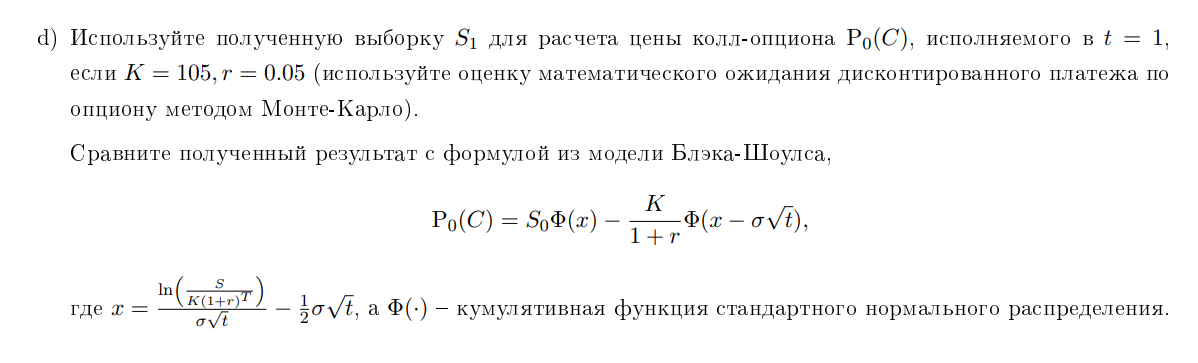

In [7]:

# Параметры опциона
K = 105       # страйк
r = 0.05      # безрисковая ставка

# Оценка цены опциона методом Монте-Карло
S1_values = np.array(S1_values)  # Используем сгенерированные значения S1
payoff = np.maximum(S1_values - K, 0)  # Выплата по колл-опциону
P0_C_MC = np.exp(-r * T) * np.mean(payoff)  # Дисконтированное математическое ожидание

print(f"Цена колл-опциона методом Монте-Карло: {P0_C_MC:.4f}")

# Оценка цены опциона по формуле Блэка-Шоулса
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

P0_C_BS = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

print(f"Цена колл-опциона по формуле Блэка-Шоулса: {P0_C_BS:.4f}")


Цена колл-опциона методом Монте-Карло: 6.6021
Цена колл-опциона по формуле Блэка-Шоулса: 6.0356


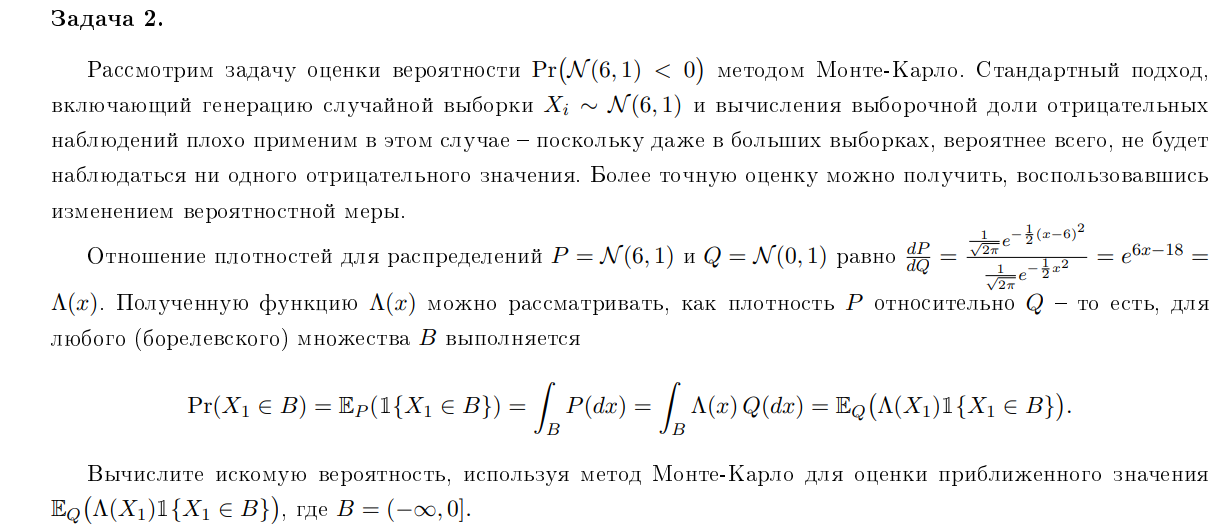

In [8]:

# Параметры задачи
mu = 6          # Среднее значение распределения P ~ N(6, 1)
sigma = 1       # Стандартное отклонение
n = 10**6       # Количество генерируемых точек
B = 0           # Граница множества B = (-∞, 0]

# Генерация выборки из Q ~ N(0, 1)
X_Q = np.random.normal(0, 1, n)

# Расчет отношения плотностей Λ(x) = exp(6x - 18)
Lambda = np.exp(6 * X_Q - 18)

# Идентификатор для множества B
indicator = (X_Q < B)

# Расчет вероятности с использованием метода Монте-Карло
probability = np.mean(Lambda * indicator)

print(f"Приближенное значение вероятности: {probability:.6e}")


Приближенное значение вероятности: 9.830363e-10


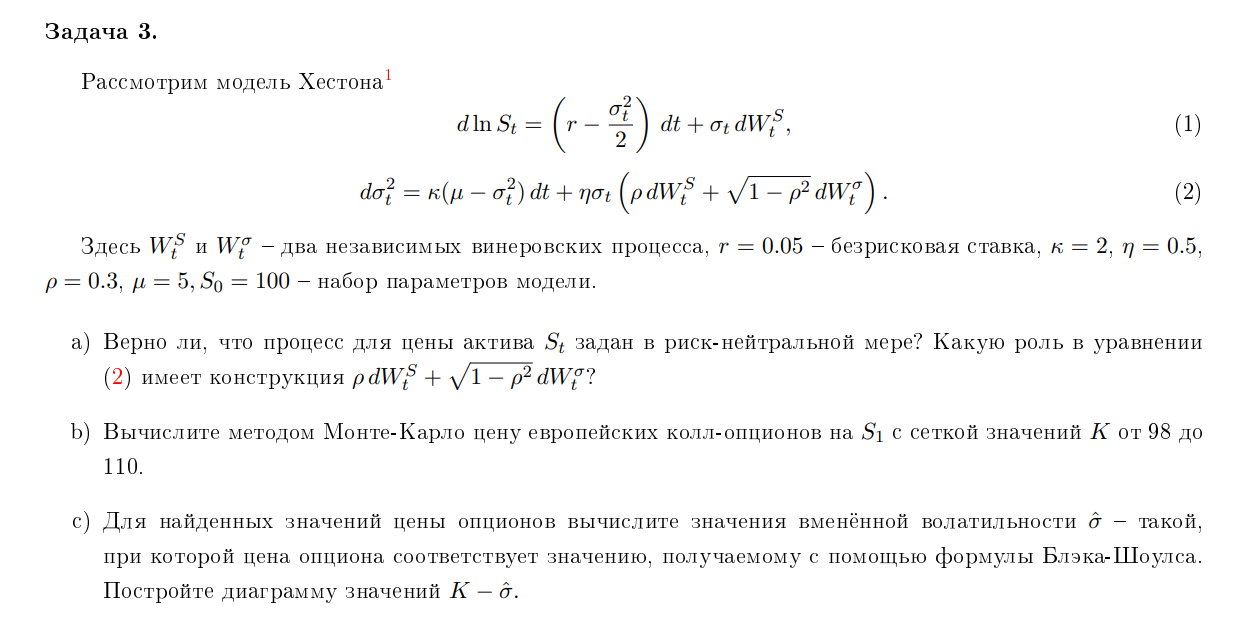

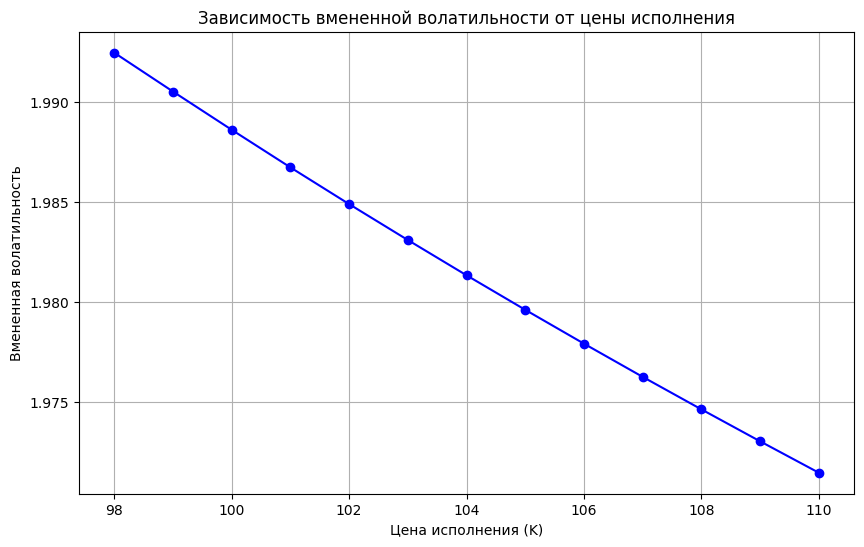

Результаты расчета для европейских колл-опционов:
Страйк (K) | Цена опциона | Вмененная волатильность
98.00       | 69.1973      | 1.9925
99.00       | 68.9921      | 1.9905
100.00       | 68.7882      | 1.9886
101.00       | 68.5858      | 1.9867
102.00       | 68.3852      | 1.9849
103.00       | 68.1862      | 1.9831
104.00       | 67.9886      | 1.9813
105.00       | 67.7927      | 1.9796
106.00       | 67.5982      | 1.9779
107.00       | 67.4053      | 1.9763
108.00       | 67.2139      | 1.9746
109.00       | 67.0238      | 1.9730
110.00       | 66.8351      | 1.9715


In [9]:


# Параметры модели Хестона
r = 0.05        # Безрисковая ставка
kappa = 2       # Скорость возврата волатильности
eta = 0.5       # Волатильность волатильности
rho = 0.3       # Коэффициент корреляции
mu = 5          # Средний уровень волатильности
S0 = 100        # Начальная цена актива
V0 = 0.04       # Начальная волатильность (sigma^2)
T = 1.0         # Время до экспирации
M = 252         # Количество временных шагов (1 год)
N = 100000      # Количество симуляций Монте-Карло
K_grid = np.linspace(98, 110, 13)  # Сетка страйков K

# Шаг по времени
dt = T / M

# Функция для генерации цен по модели Хестона
def heston_paths(S0, V0, r, kappa, eta, rho, mu, T, M, N):
    np.random.seed(42)
    dt = T / M
    S = np.zeros((M + 1, N))
    V = np.zeros((M + 1, N))
    S[0] = S0
    V[0] = V0

    for t in range(1, M + 1):
        # Генерация двух коррелированных винеровских процессов
        dW1 = np.random.normal(0, np.sqrt(dt), N)
        dW2 = rho * dW1 + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt), N)
        
        # Обновление волатильности с учетом неотрицательности
        V[t] = np.maximum(V[t - 1] + kappa * (mu - V[t - 1]) * dt + eta * np.sqrt(V[t - 1]) * dW2, 0)
        
        # Обновление цены актива
        S[t] = S[t - 1] * np.exp((r - 0.5 * V[t]) * dt + np.sqrt(V[t]) * dW1)

    return S, V

# Функция для расчета цены колл-опциона методом Монте-Карло
def monte_carlo_call_price(S, K, r, T):
    payoff = np.maximum(S[-1] - K, 0)  # Выплата для колл-опциона
    return np.exp(-r * T) * np.mean(payoff)  # Приведение к текущей стоимости

# Формула Блэка-Шоулса для вычисления цены колл-опциона
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Функция для нахождения вмененной волатильности
def implied_volatility(S, K, T, r, market_price):
    def error_function(sigma):
        return black_scholes_call(S, K, T, r, sigma) - market_price
    try:
        return brentq(error_function, 1e-6, 5)  # Решение уравнения методом Брента
    except ValueError:
        return np.nan  # Возвращаем NaN, если решение не найдено

# Генерация траекторий модели Хестона
S_paths, V_paths = heston_paths(S0, V0, r, kappa, eta, rho, mu, T, M, N)

# Расчет цен опционов на сетке K и нахождение вмененной волатильности
call_prices = []
implied_vols = []
for K in K_grid:
    call_price = monte_carlo_call_price(S_paths, K, r, T)  # Цена опциона методом Монте-Карло
    call_prices.append(call_price)
    iv = implied_volatility(S0, K, T, r, call_price)  # Вмененная волатильность
    implied_vols.append(iv)

# Построение графика K - вмененная волатильность
plt.figure(figsize=(10, 6))
plt.plot(K_grid, implied_vols, marker='o', linestyle='-', color='b')
plt.xlabel('Цена исполнения (K)')
plt.ylabel('Вмененная волатильность')
plt.title('Зависимость вмененной волатильности от цены исполнения')
plt.grid(True)
plt.show()

# Вывод результатов на русском
print("Результаты расчета для европейских колл-опционов:")
print("Страйк (K) | Цена опциона | Вмененная волатильность")
for i, K in enumerate(K_grid):
    print(f"{K:.2f}       | {call_prices[i]:.4f}      | {implied_vols[i]:.4f}")
